In [27]:
%matplotlib inline

In [7]:
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl
import os
import gdal
from osgeo import osr

# import numpy
import numpy as np

# import necessary landlab components
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import(FlowDirectorD8, 
                               FlowDirectorDINF, 
                               FlowDirectorMFD, 
                               FlowDirectorSteepest)

# import landlab plotting functionality
from landlab.plot.drainage_plot import drainage_plot

# create a plotting routine to make a 3d plot of our surface. 
def surf_plot(mg, surface='topographic__elevation', title='Surface plot of topography'):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z-Z.min())/(Z.max()-Z.min()))
    surf = ax.plot_surface(mg.node_x.reshape(mg.shape), mg.node_y.reshape(mg.shape), 
                           Z,
                           rstride=1, cstride=1,
                           facecolors=color,
                           linewidth=0., 
                           antialiased=False)
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Elevation')
    plt.title(title)
    plt.show()

In [13]:
location = (r'C:/PhD/junk')
os.chdir(location)
ds = gdal.Open('gully_test.tif')
x = np.array(ds.GetRasterBand(1).ReadAsArray())
input_DEM = x[1:9, 1:9]

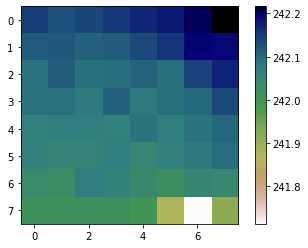

In [14]:
plt.imshow(input_DEM, cmap="gist_earth_r");
plt.colorbar();

In [14]:
input_DEM = np.array([[100, 100, 100, 100, 100, 100, 100, 100, 100],
                      [90, 80, 70, 50, 30, 50, 70, 80, 90],
                      [80, 60, 40, 30, 20, 30, 40, 60, 80],
                      [70, 55, 35, 25, 15, 25, 35, 55, 70],
                      [60, 45, 25, 20, 10, 20, 25, 45, 60],
                      [50, 35, 15, 10, 5, 10, 15, 35, 50],
                      [40, 25, 10, 7, 3, 7, 10, 25, 40],
                      [30, 15,  5, 4, 1,  4,  5, 15, 30],
                      [20,  5, 3,  2, 0,  2,  3,  5, 20]], dtype = 'Float64')

C:\Users\sjwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


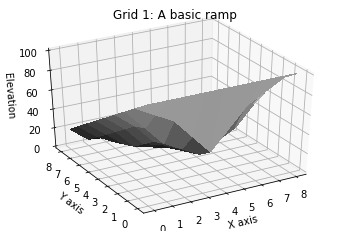

In [15]:
mg1 = RasterModelGrid((9,9), spacing= 1)
_ = mg1.add_field('topographic__elevation', input_DEM, at = 'node')

surf_plot(mg1, title='Grid 1: A basic ramp')

In [15]:
flow_acc_surf = np.copy(input_DEM).astype('float64');
rows = flow_acc_surf.shape[0];
cols = flow_acc_surf.shape[1];
mg1 = RasterModelGrid((rows,cols), 1);
z1 = mg1.add_field('topographic__elevation', flow_acc_surf, at = 'node');

In [16]:
fd = FlowDirectorSteepest(mg1, 'topographic__elevation')

In [17]:
fd.run_one_step()
receivers = fd.direct_flow()
print(receivers)

[ 0  1  2  3  4  5  6  7  8 10 18 19 20 21 22 15 16 16 26 18 28 21 21 23 24
 33 34 35 28 37 38 31 32 41 42 35 44 45 37 39 40 49 41 44 52 53 54 47 48 57
 58 59 60 61 62 55 56 57 58 59 60 61 62 63]


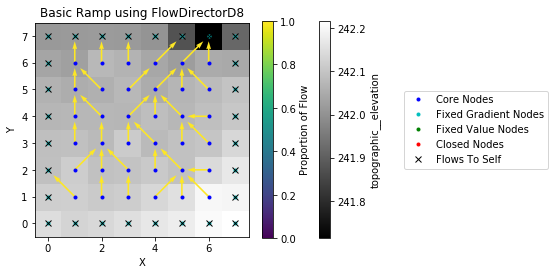

In [18]:
#fd = FlowDirectorSteepest(mg1, diagonals = True);
fd = FlowDirectorD8(mg1)
fd.run_one_step();
plt.figure();
drainage_plot(mg1, title='Basic Ramp using FlowDirectorD8');

In [19]:
 mg1.at_node.keys()

dict_keys(['topographic__elevation', 'flow__sink_flag', 'flow__receiver_node', 'topographic__steepest_slope', 'flow__link_to_receiver_node'])

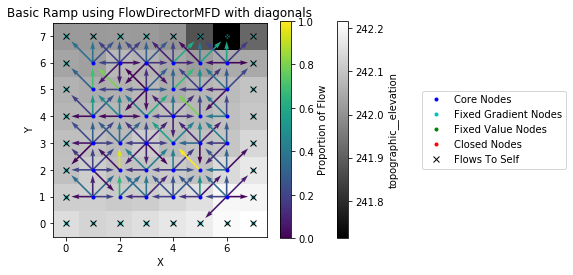

In [19]:
fd = FlowDirectorMFD(mg1, diagonals=True)
fd.run_one_step()
plt.figure()
drainage_plot(mg1, title='Basic Ramp using FlowDirectorMFD with diagonals')